# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("C:\\datasets\\real_estate_data.csv", sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Цель исследования - изучить данные рынка недвижимости г. Санкт - Петербурга, выявить зависимость стоимостных характеристик объекта недвижимости от объективных характеристик данных объектов, таких как местоположение, наличие парков, водоемов, этажности здания и характеристик самого объекта: площади, этажа и количества комнат. В итоге составить описание идеального объекта недвижимости для быстрой продажи в г. Санкт - Петербург, спрогнозировав ее длительность на основании изучения данных датасета. 

В полученном датасете имеются 22 колонки, содержащие следующую информацию:

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах (м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — общая площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении


In [2]:
data.shape

(23699, 22)

Датасет содержит достаточно большое количество наблюдений 23699 и 22 колонки.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Предобработка данных

Данные представлены как количественные, так и категориальные. Типы данных строки, числа целые и дробные, булевы значения (колонки: квартира -студия и свободная планировка). Результат выполнения метода показывает наличие пропущенных значений во многих колонках. 

In [4]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

В колонке cityCenters_nearest нарушены правила наименования, приведем в соответствие и переименуем в "змеиный язык".

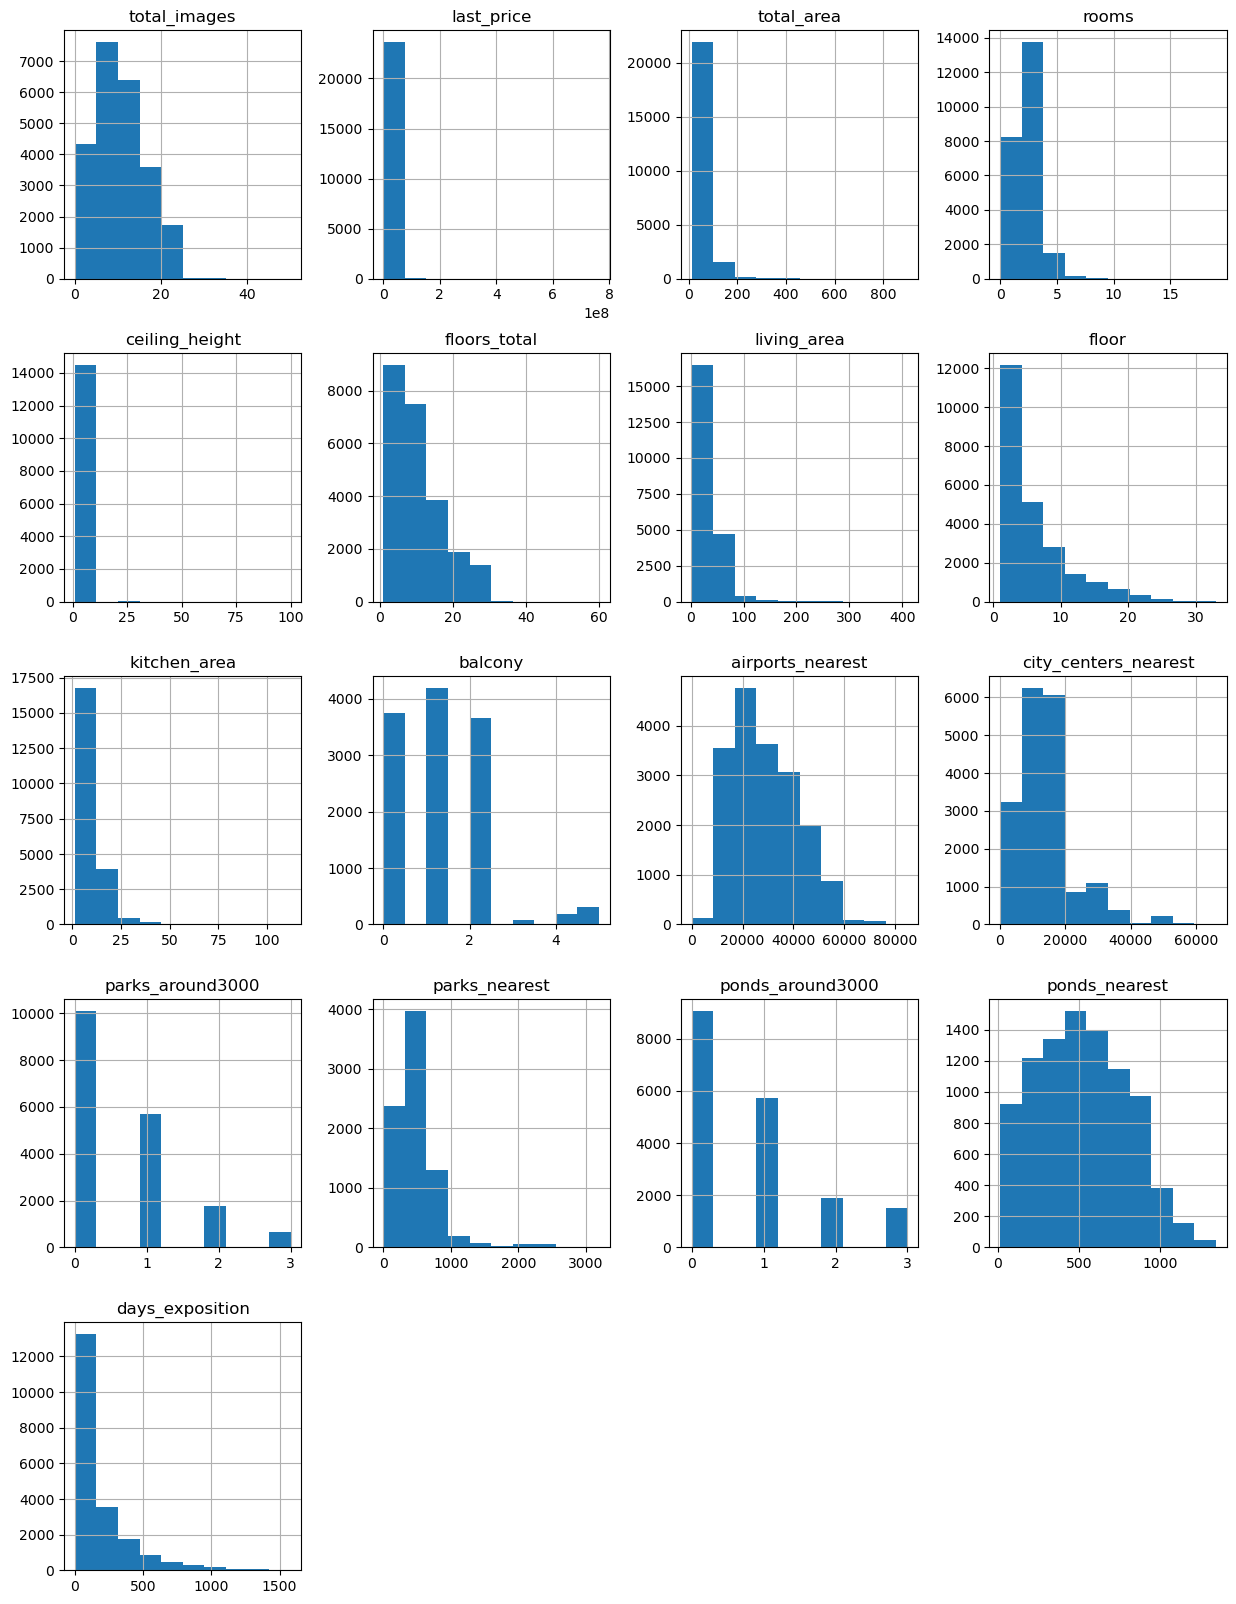

In [5]:
data.hist(figsize=(15, 20));

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Данные датасета имеют пропущенные значения по многим колонкам:
1. высота потолков, всего этажей в доме, 
2. жилая площадь в квадратных метрах (м²), 
3. апартаменты (булев тип), площадь кухни,
4. число балконов, название населённого пункта,
5. расстояние до ближайшего аэропорта в метрах (м),
6. расстояние до центра города (м),
7. число парков в радиусе 3 км, 
8. расстояние до ближайшего парка (м),
9. число водоёмов в радиусе 3 км, 
10. расстояние до ближайшего водоёма (м), 
11. сколько дней было размещено 

Отсутствие значений в колонках про парки, пруды, аэропорты, близость центра города говорит об отсутствии этих характеристик у объекта недвижимости - поработаем с этими данными, заменив их отсутствие на медианные значения.   Есть данные пропущенные при заполнении объявления: высота потолков, количество этажей в доме, название населенного пункта и жилая площадь в квадратных метрах, их оставим тоже оставим без изменений. Однако, есть данные с которыми можно поработать: пропущенные данные о количестве балконов свидетельствуют об отсутствии балкона у объектов недвижимости, заменим их на 0,  is_apartment, если данные объекты не апартаменты, присвоим, согласно булевой логике, значение False. Площадь кухни отсутствует в объектах недвижимости типа "студия", проверим эти данные. Очевидно, необходима работа по предобработке данных. 

In [7]:
data.duplicated().sum()

0

Проверка датафрейма на явные дубликаты методом duplicated() показала их отсутствие. Продолжим работу. 

Начнем предобработку данных по порядку.

In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Заполним пустые значения колонки ceiling_height — высота потолков (м) на медианные значения, которые не искажают данные.

In [9]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

Заполним пустые значения колонки floors_total — количество этажей на медианные значения, которые не искажают данные.

In [10]:
data['living_area'] = data['living_area'].fillna(data['living_area'].median())

Заполним пустые значения колонки living_area — living_area — жилая площадь в квадратных метрах (м²) на медианные значения, которые не искажают данные.

In [11]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

Заполним пустые значения колонки kitchen_area — площадь кухни на медианные значения, которые не искажают данные.

In [12]:
data['balcony'] = data['balcony'].fillna(0)

Заменяем пустые данные Null колонки 'balcony' на значение 0.

In [13]:
data['locality_name'] = data['locality_name'].fillna(value='')

Поскольку locality_name колонка название населенного пункта не количественное значение, заполнить его нет никакой возможности, оставим пустые данные в виде " ".

In [14]:
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())

Заполним пустые значения колонки airports_nearest — расстояние до ближайшего аэропорта в метрах (м) на медианные значения, которые не искажают данные.

In [15]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data['city_centers_nearest'].median())

Заполним пустые значения колонки city_centers_nearest — расстояние до центра города в метрах (м) на медианные значения, которые не искажают данные.

In [16]:
data['parks_around3000'] = data['parks_around3000'].fillna(data['parks_around3000'].median())

Заполним пустые значения колонки parks_around3000 — число парков в радиусе 3 км на медианные значения, которые не искажают данные.

In [17]:
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())

Заполним пустые значения колонки parks_nearest — расстояние до ближайшего парка (м)  на медианные значения, которые не искажают данные.

In [18]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(data['ponds_around3000'].median())

Заполним пустые значения колонки ponds_around3000 — число водоемов в радиусе 3 км на медианные значения, которые не искажают данные.

In [19]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())

Заполним пустые значения колонки parks_nearest — расстояние до ближайшего водоема на медианные значения, которые не искажают данные.

In [20]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())

Заполним пустые значения колонки days_exposition — сколько дней было размещено объявление (от публикации до снятия) на медианные значения, которые не искажают данные.

Проверим внесенные данные, количество строк не пустых значений должно быть 23699 

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Данные колонок заполнились:

их количество соответствует 23699, а значит пропущенных значений нет. С пропусками остался только is_apartment.


Необходимо изменить типы данных у колонок:

    'last_price' - цена на момент снятия с публикации
    'floors_total' - всего этажей в доме
    'balcony' - число балконов
    'days_exposition' - сколько дней было размещено объявление (от публикации до снятия)

со значения с плавающей запятой float64 на целочисленное значение int64. Замена необходима потому что значения этих колонок могут быть только целыми числами.
'first_day_exposition' - дата публикации с object на datetime64. Замена необходима для возможности дальнейших операций с числами, поскольку существующее строковое значение этого не позволяет.Значения 'is_apartment' с object на булево значение bool. Нужна замена со строкового значения на булево для дальнейшей работы с данными и применения возможностей бинарной логики к колонке данных.

In [22]:
try:

    data['last_price'] = data['last_price'].astype('int64')

    print('Замена прошла last_price  - цена на момент снятия с публикации')

except:

    print('Ошибка')

Замена прошла last_price  - цена на момент снятия с публикации


In [23]:

try:

    data['floors_total'] =  data['floors_total'].astype('Int64')

    print('Замена прошла floors_total — всего этажей в доме')

except:

    print('Ошибка')

Замена прошла floors_total — всего этажей в доме


In [24]:
try:

    data['balcony'] = data['balcony'].astype('int64')

    print('Замена прошла  balcony - число балконов')

except:

    print('Ошибка')

Замена прошла  balcony - число балконов


In [25]:
try:

    data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')

    print(' Замена прошла  days_exposition — сколько дней было размещено объявление от публикации до снятия')

except:

    print('Ошибка')

 Замена прошла  days_exposition — сколько дней было размещено объявление от публикации до снятия


In [26]:
try:    

    data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

    print('Замена прошла first_day_exposition - — дата публикации')

except:

    print('Ошибка')

Замена прошла first_day_exposition - — дата публикации


In [27]:
try: 

    data['is_apartment'].fillna(False, inplace=True)

    print('Замена прошла is_apartment')

except:

    print('Ошибка')

Замена прошла is_apartment


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  Int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Проверим внесенные изменения:

last_price - int64,
floors_total - int64,
balcony - int64,
days_exposition - int64,
first_day_exposition - datetime64,
is_apartment - bool

Отлично! Теперь займусь уникальными значениями.

In [29]:
len(data['locality_name'].unique())

365

Логично предположить что основное количество проблем с уникальными данными в не количественных значениях будет в названии населенного пункта. Посмотрим на них.

In [30]:
set(data['locality_name'])

{'',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'го

In [31]:
data['locality_name'] = data['locality_name'].str.lower()

data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

Неявные дубликаты присутствуют в датасете:

    «поселок Рябово» и «поселок городского типа Рябово»,
    «поселок Тельмана» и «посёлок Тельмана»

Возможно есть и другие совпадения. Проверим.


In [32]:
words= ['городской', 'садовое', 'товарищество', 'поселок','село', 'типа', 'городского', 'деревня','посёлок']

ln = data['locality_name']

new_ln = []
 
for row in ln:
    x = str(row)
    y = x.split()
    resultwords  = [word for word in y if word not in words]
    result = ' '.join(resultwords)
    new_ln.append(result)

data['name_new'] = new_ln
data[['locality_name', 'name_new']]

,locality_name,name_new
0,санкт-петербург,санкт-петербург
1,поселок шушары,шушары
2,санкт-петербург,санкт-петербург
3,санкт-петербург,санкт-петербург
4,санкт-петербург,санкт-петербург
...,...,...
23694,санкт-петербург,санкт-петербург
23695,тосно,тосно
23696,село рождествено,рождествено
23697,санкт-петербург,санкт-петербург


In [33]:
data['locality_name'] = data['name_new']

data['locality_name']


0        санкт-петербург
1                 шушары
2        санкт-петербург
3        санкт-петербург
4        санкт-петербург
              ...       
23694    санкт-петербург
23695              тосно
23696        рождествено
23697    санкт-петербург
23698        новый учхоз
Name: locality_name, Length: 23699, dtype: object

Количество строк сохранено, не явные дубликаты устранены циклом.

Приведем названия населенных пунктов к нижнему регистру и заменим ё на е. Проверим уникальные значения.

In [34]:
len(data['locality_name'].unique())

310

Работа с выбивающимися значениями с помощью графиков ящик с усами, показывающих выбивающиеся значения по количественным столбцам. Создадим их с помощью цикла.

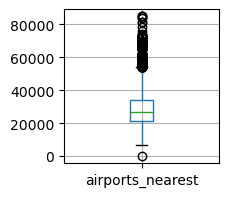

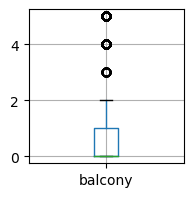

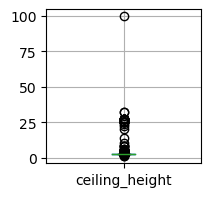

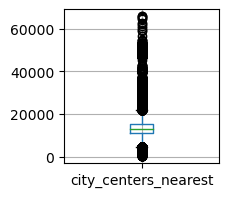

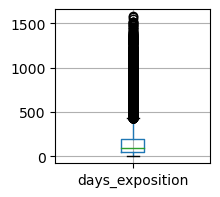

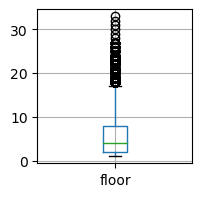

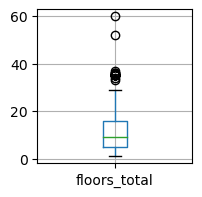

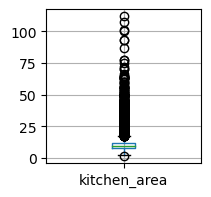

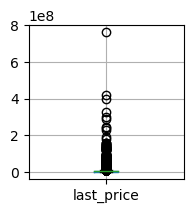

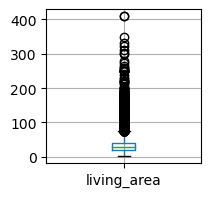

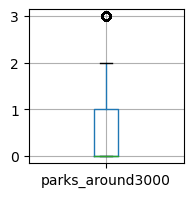

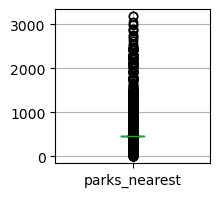

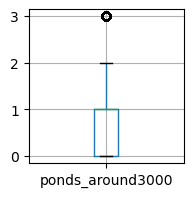

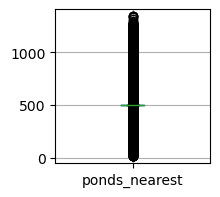

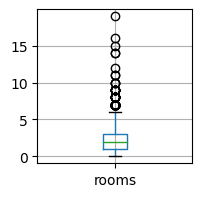

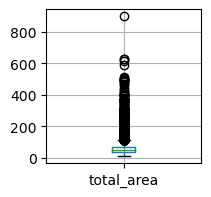

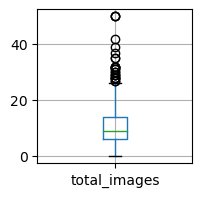

In [35]:
columns = [
    'airports_nearest', 
    'balcony', 
    'ceiling_height', 
    'city_centers_nearest', 
    'days_exposition', 
    'floor', 
    'floors_total', 
    'kitchen_area', 
    'last_price', 
    'living_area', 
    'parks_around3000', 
    'parks_nearest', 
    'ponds_around3000', 
    'ponds_nearest', 
    'rooms', 
    'total_area', 
    'total_images'
]

for column in columns:
    plt.figure(figsize=(2,2))
    data.boxplot(column)

Данные графиков с четырьмя квартилями показывают значения, выбивающиеся из массы других. Значения которые выходят за усы графика, свидетельствуют о наличии проблем, с которыми нужно поработать. Так аномальные значения есть в колонках:

    ceiling_height,
    last_price,
    total_area.

Разберемся с ними поподробнее по порядку.

In [36]:
print('Количество квартир с высотой потолка от 0 до 2:', 
      data.query("ceiling_height>= 0 and ceiling_height<=2") ['ceiling_height'].count()
)

Количество квартир с высотой потолка от 0 до 2: 14


In [37]:
print('Количество квартир с высотой потолка от 2 до 6:', 
      data.query("ceiling_height > 2 and ceiling_height < 6") ['ceiling_height'].count()
)

Количество квартир с высотой потолка от 2 до 6: 23655


In [38]:
print('Количество квартир с высотой потолка от 6 до 20:', 
      data.query("ceiling_height>= 6 and ceiling_height<=20") ['ceiling_height'].count()
)

Количество квартир с высотой потолка от 6 до 20: 8


In [39]:
print('Количество квартир с высотой потолка от 60 до 100:', 
      data.query("ceiling_height>= 60 and ceiling_height<=100") ['ceiling_height'].count()
)

Количество квартир с высотой потолка от 60 до 100: 1


In [40]:
data['ceiling_height'].value_counts ()

2.65    9871
2.50    3515
2.60    1646
2.70    1574
3.00    1112
        ... 
5.00       1
2.20       1
4.15       1
3.93       1
3.59       1
Name: ceiling_height, Length: 183, dtype: int64

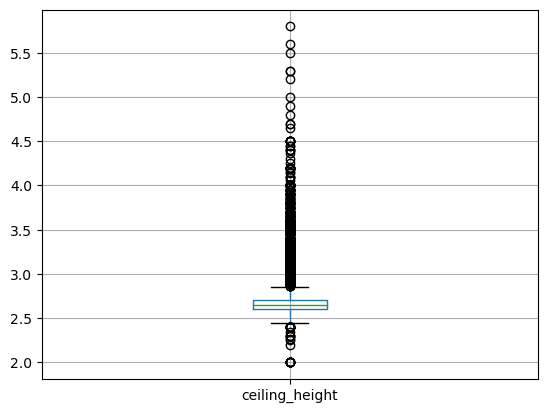

In [41]:
list = []
for row in data['ceiling_height']:
    if 0 <=row < 2 or 6 <= row < 20 or 60 <= row <= 100:
        list.append(None)
    elif 20 <= row < 60:
        list.append(row/10)
    else: list.append(row)
data['ceiling_height'] = list
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.boxplot('ceiling_height');

Начальные значения в поле ceiling_height содержали значения от 20 до 60. Скорее всего это опечатка и человеческий фактор. Для устранения разделим эти числа на 10. Значения от 6 до 20 метров и от 60 до 100 сложнее назвать простой опечаткой, скорее всего это ошибка при заполнении объявления. Заменим значения на NaN, а затем медианным значением. Значения от 0 до 2 метров в объектах недвижимости, как правило, не бывает.

In [42]:
print('Квартир стоимостью 0:', data.query('last_price == 0')['last_price'].count())
print('Квартир стоимостью до 15 млн.:', data.query('last_price <= 15000000')['last_price'].count())
print('Квартир стоимостью от 15 до до 50 млн.:', data.query('last_price > 15000000 and last_price <= 50000000')['last_price'].count())
print('Квартир стоимостью от 50 до 100 млн.:', data.query('last_price > 50000000 and last_price <= 100000000')['last_price'].count())
print('Квартир стоимостью свыше 100 млн.:', data.query('last_price > 100000000')['last_price'].count())

Квартир стоимостью 0: 0
Квартир стоимостью до 15 млн.: 22495
Квартир стоимостью от 15 до до 50 млн.: 1073
Квартир стоимостью от 50 до 100 млн.: 94
Квартир стоимостью свыше 100 млн.: 37


Изучим данные по стоимости квартир. В Санкт - Петербурге можно допустить цену выше 50 млн. Эти значения лучше или оставить как есть.

Посмотрим на распределение значений колонки общая площадь квартиры в квадратных метрах (м²) основной массив значений идет до 100 кв, совсем мало значений свыше 200 и немного около 300.


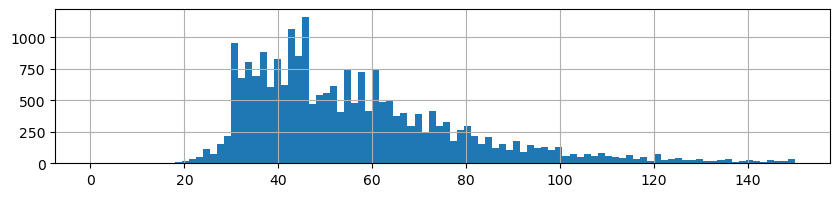

In [43]:
data['total_area'].hist(bins=100, range=(0, 150), figsize=(10,2)); 

Площадь квартир от 0 до 33: 2552
Площадь квартир от 33 до 75: 16534
Площадь квартир от 75 до 110: 3238
Площадь квартир свыше 110: 1375


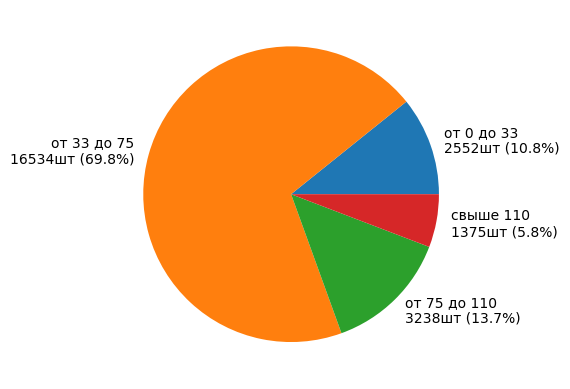

In [44]:
count1 = data.query('total_area <= 33')['total_area'].count()
count2 = data.query('total_area > 33 and total_area <= 75')['total_area'].count()
count3 = data.query('total_area > 75 and total_area <= 110')['total_area'].count()
count4 = data.query('total_area > 110')['total_area'].count()

print('Площадь квартир от 0 до 33:', count1)
print('Площадь квартир от 33 до 75:', count2)
print('Площадь квартир от 75 до 110:', count3)
print('Площадь квартир свыше 110:', count4)

count_total = count1+count2+count3+count4
df=pd.DataFrame(
    {'count':[count1,count2,count3,count4]},
    index=[
        'от 0 до 33\n'+str(count1)+'шт ('+str(round(100*count1/count_total,1))+'%)', 
        'от 33 до 75\n'+str(count2)+'шт ('+str(round(100*count2/count_total,1))+'%)', 
        'от 75 до 110\n'+str(count3)+'шт ('+str(round(100*count3/count_total,1))+'%)',
        'свыше 110\n'+str(count4)+'шт ('+str(round(100*count4/count_total,1))+'%)'
    ]
)
df.plot(y='count', legend=False, ylabel='', kind='pie');

Посмотрим на площадь объектов недвижимости. Объекты площадью свыше 110 кв.м. в количестве 1375 шт.(5,8%) относятся к элитным объектам недвижимости. В городе Санкт - Петербург можно допустить наличие объектов болшой площади, оставим данные как есть.

Представленные для исследования данные о рынке недвижимости Санкт - Петербурга содержали 23 тыс. объявлений о продаже жилой недвижимости г. Санкт - Петербурга и его окрестностей. В данных были выявлены некоторые проблемы в виде отсутствующих значений, совпадений названий населенных пунктов.  Проблемы отсутствующий значений были решены  заменой отсутствующих значений на медианные по соответстующим столбцам. Проблемы наименований были решины устранением неявных дубликатов. Проанализированы данные цены и площади объектов недвижимости, выбивающиеся значения решено оставить, поскольку г. Санкт - Петербург допускает наличие элитной недвижимости большой стоимости и площади.

### Посчитайте и добавьте в таблицу новые столбцы

Добавление новых столбцов:


In [45]:
data['one_metr_price'] = data['last_price'] / data['total_area']

Стоимость 1 квадратного метра

In [46]:
data['weekday_exposition'] = data['first_day_exposition'].dt.dayofweek

День недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [47]:
data['month_exposition'] = data['first_day_exposition'].dt.month

Месяц публикации объявления.

In [48]:
data['year_exposition'] = data['first_day_exposition'].dt.year

Год публикации объявления.

In [49]:
data['floor_type'] = np.where(
    data['floor'] == 1,
    'Первый', 
    np.where(data['floor'] == data['floors_total'],
             'Последний', 'Другой')
)

Тип этажа квартиры (значения — «первый», «последний», «другой»).

In [50]:
data['center_distance_km'] = round(data['city_centers_nearest']/1000)

Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

### Проведите исследовательский анализ данных

Проведем исследовательский анализ данных, рассмотрим данные

    общая площадь;
    жилая площадь;
    площадь кухни;
    цена объекта;
    количество комнат;
    высота потолков;
    этаж квартиры;
    тип этажа квартиры («первый», «последний», «другой»);
    общее количество этажей в доме;
    расстояние до центра города в метрах;
    расстояние до ближайшего аэропорта;
    расстояние до ближайшего парка;
    день и месяц публикации объявления.

In [51]:
count1 = data.query('total_area <= 33')['total_area'].count()
count2 = data.query('total_area > 33 and total_area <= 75')['total_area'].count()
count3 = data.query('total_area > 75 and total_area <= 110')['total_area'].count()

print('Площадь квартир от 0 до 33:', count1)
print('Площадь квартир от 33 до 75:', count2)
print('Площадь квартир от 75 до 110:', count3)

Площадь квартир от 0 до 33: 2552
Площадь квартир от 33 до 75: 16534
Площадь квартир от 75 до 110: 3238


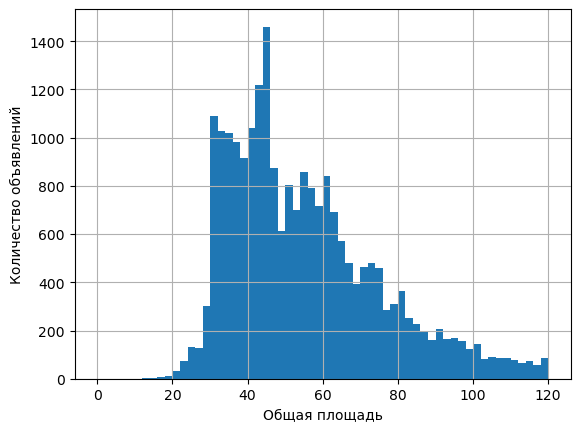

In [52]:
gr = data['total_area'].hist(bins=60, range=(0, 120))
gr.set(xlabel='Общая площадь', ylabel='Количество объявлений')
gr;

Рассмотрим гистограмму общей площади объектов недвижимости. Объекты недвижимости площадью более 110 кв.м. не участвуют в исследовании, поскольку выбиваются, и заменены на медианные значения. На графике видно, что основной массив объектов недвижимости имеет площадь от 30 до 70 кв. метров. Большой пик объявлений со значением около 50 кв.м., более мелкие пики около 30 и 42. На графике видно, что предложение квартир с площадью больше 60 кв.м. уменьшается.

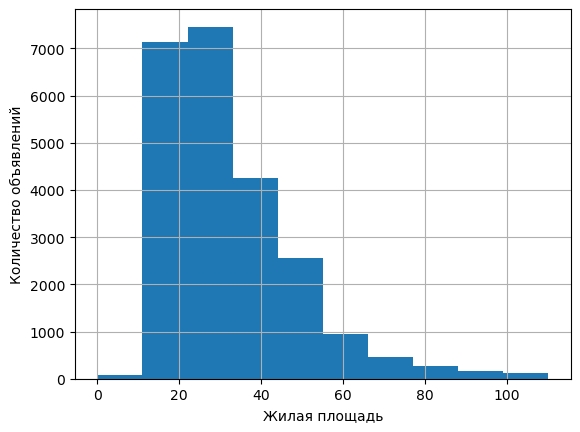

In [53]:
gr = data['living_area'].plot(
    kind='hist', 
    legend=False, 
    grid=True, 
    range=(0,110)
)
gr.set(xlabel='Жилая площадь', ylabel='Количество объявлений')
gr;

Гистограмма жилой площади показывает, что основное количество объектов недвижимости имеет жилую площадь около 30 кв.метров. После 60, их количество снижается и сходит на нет.

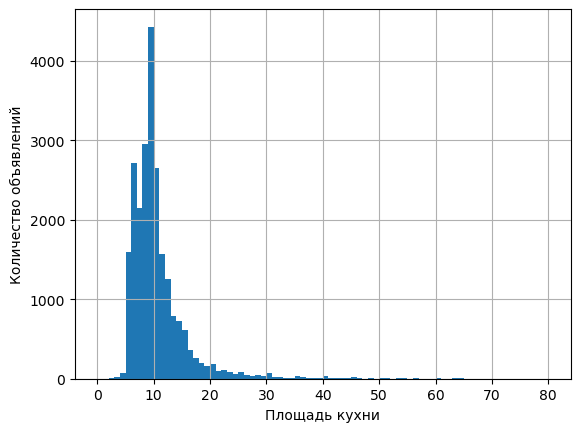

In [54]:
gr = data['kitchen_area'].plot(
    kind='hist', 
    legend=False, 
    grid=True, 
    range=(0,80),
    bins=80
)
gr.set(xlabel='Площадь кухни', ylabel='Количество объявлений')
gr;

Площадь кухни, судя по гистограмме, у большинства квартир составляет 10 метров, далее после 15, количество квартир с большей площадью кухни снижается и уходит на нет. Изменим параметры графика, чтобы увидеть больше пиков.


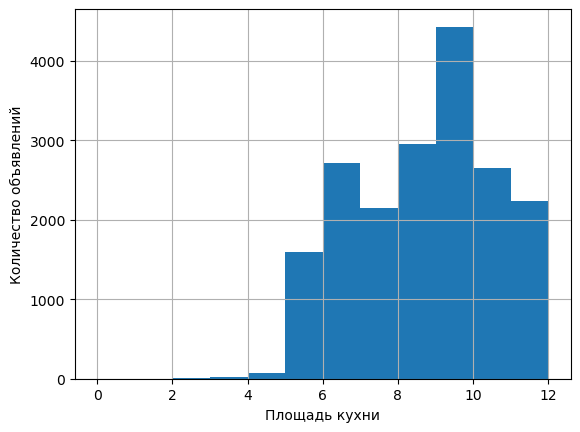

In [55]:
gr =data['kitchen_area'].plot(
    kind='hist',
    legend=False, 
    grid=True, 
    range=(0,12),
    bins=12
);
gr.set(xlabel='Площадь кухни', ylabel='Количество объявлений')
gr;

На измененном графике площади кухни стали заметны пики в 6 кв.м. и в 9 кв.м. Данные уточнились благодаря визуализации.

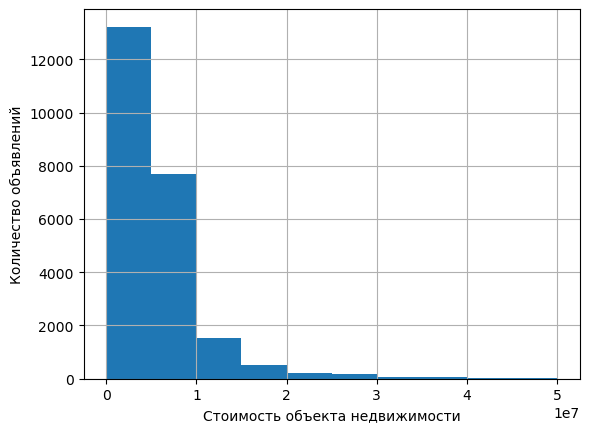

In [56]:
gr = data['last_price'].plot(kind='hist', legend=False, 
    grid=True, range=(0,50000000));

gr.set(xlabel='Стоимость объекта недвижимости', ylabel='Количество объявлений')
gr;

В графике квартиры дешевле 50 млн.(цена квартир стоимостью выше была заменена на медианное значение). Изменим параметры графика, чтобы увидеть подробности данных т.к. основное количество квартир продается дешевле.

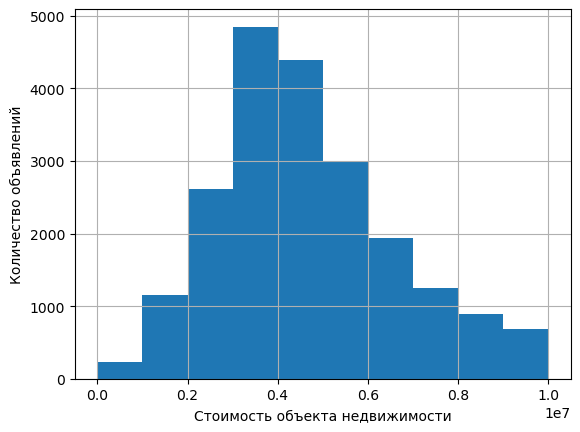

In [57]:
gr =data['last_price'].plot(kind='hist', legend=False, 
    grid=True, range=(0,10000000));
gr.set(xlabel='Стоимость объекта недвижимости', ylabel='Количество объявлений')
gr;

На уточненном графике видно, что стоимость квартир около 4-5 млн. р. является основной.

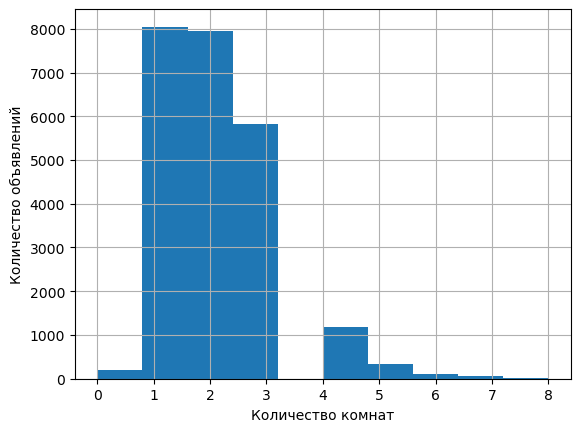

In [58]:
gr =data['rooms'].plot(kind='hist', legend=False, 
    grid=True, range=(0,8));
gr.set(xlabel='Количество комнат', ylabel='Количество объявлений')
gr;

Количество комнат 1-2 является наиболее распространенным. 3 комнатные квартиры встречаются реже.

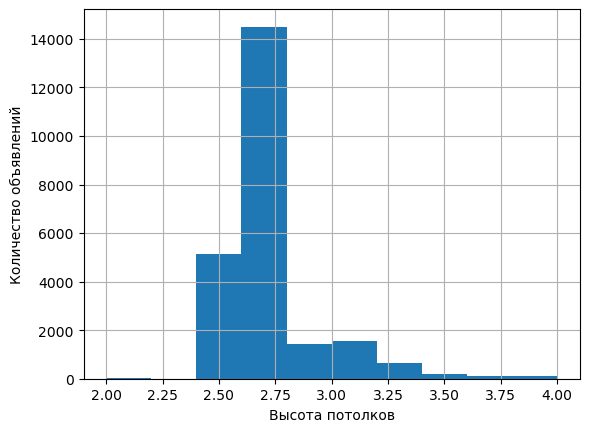

In [59]:
gr =data['ceiling_height'].plot(kind='hist', legend=False, grid=True, range=(2,4));
gr.set(xlabel='Высота потолков', ylabel='Количество объявлений')
gr;

Абсолютным лидером среди высоты потолков является значение 2.75.

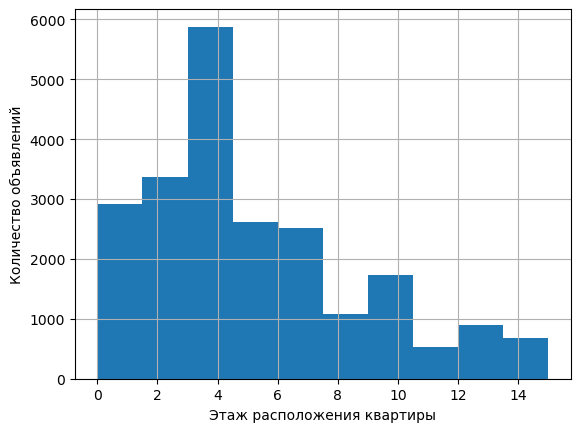

In [60]:
gr =data['floor'].plot(kind='hist', legend=False, 
    grid=True, range=(0,15));
gr.set(xlabel='Этаж расположения квартиры', ylabel='Количество объявлений')
gr;

Самым распространенным расположением квартир на этажах является 3-4 этаж.

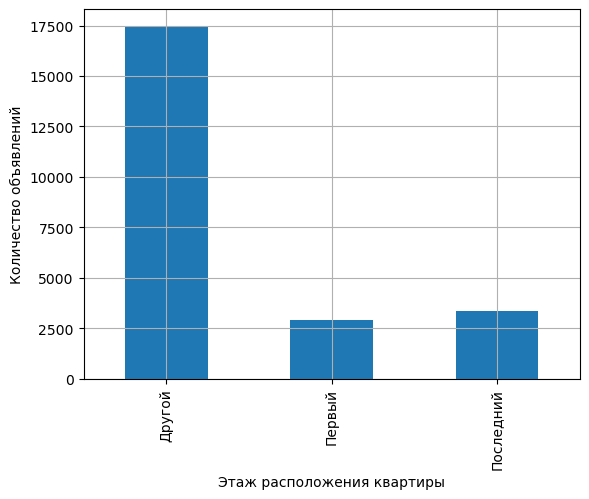

In [61]:
gr =data['floor_type'].value_counts().sort_index(ascending=True).plot.bar(legend=False, 
    grid=True,);
gr.set(xlabel='Этаж расположения квартиры', ylabel='Количество объявлений')
gr;

Самое большое количество квартир не на первом и не на последнем этаже.

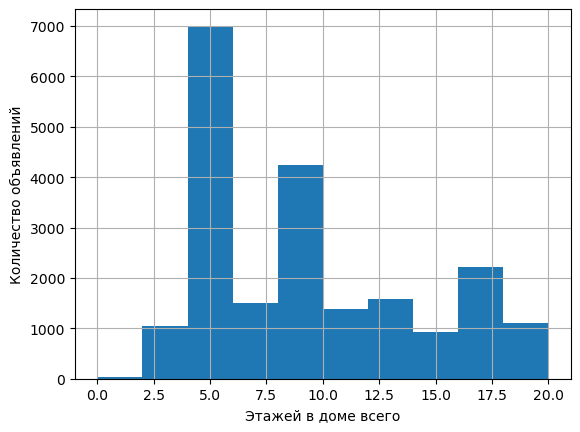

In [62]:
gr =data['floors_total'].plot(kind='hist', legend=False, 
    grid=True, range=(0,20));
gr.set(xlabel='Этажей в доме всего', ylabel='Количество объявлений')
gr;

Гистограмма количества этажей в доме показывает, что Санкт - Петербург, судя по продаваемым квартирам, пятиэтажный город, есть еще пики на 10 этажах.

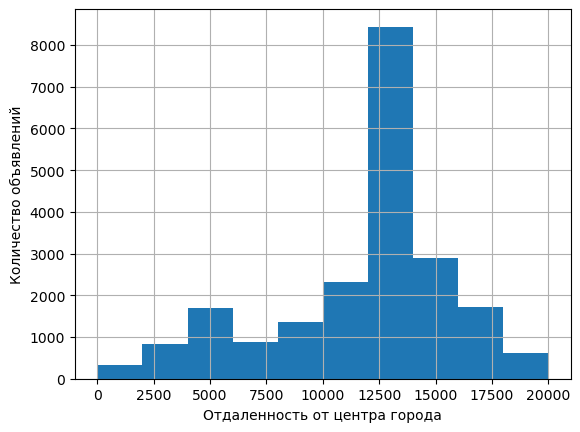

In [63]:
gr =data['city_centers_nearest'].plot(kind='hist', legend=False, 
    grid=True, range=(0,20000));
gr.set(xlabel='Отдаленность от центра города', ylabel='Количество объявлений')
gr;

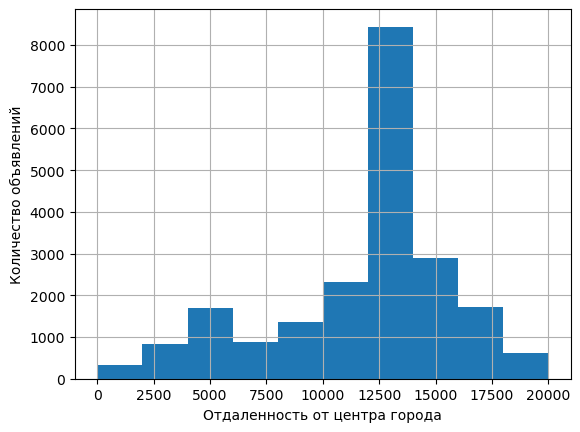

In [64]:
gr =data['city_centers_nearest'].plot(kind='hist', legend=False, 
    grid=True, range=(0,20000));
gr.set(xlabel='Отдаленность от центра города', ylabel='Количество объявлений')
gr;

Гистограмма расстояния от продаваемых квартир до центра города имеет большое пик в районе 13 км.


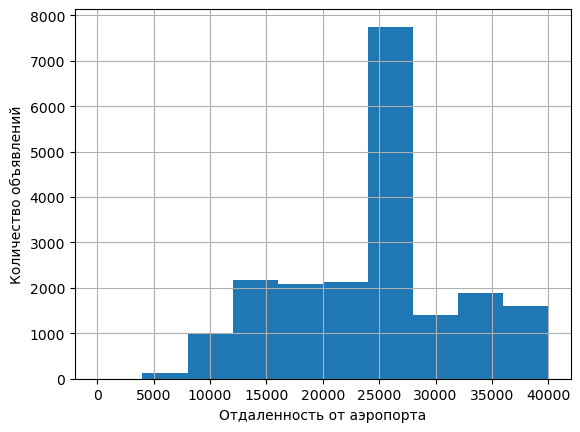

In [65]:
gr =data['airports_nearest'].plot(kind='hist', legend=False, 
    grid=True, range=(0,40000));
gr.set(xlabel='Отдаленность от аэропорта', ylabel='Количество объявлений')
gr;

Большинство продаваемых квартир расположено от аэропорта на расстоянии около 25 км.


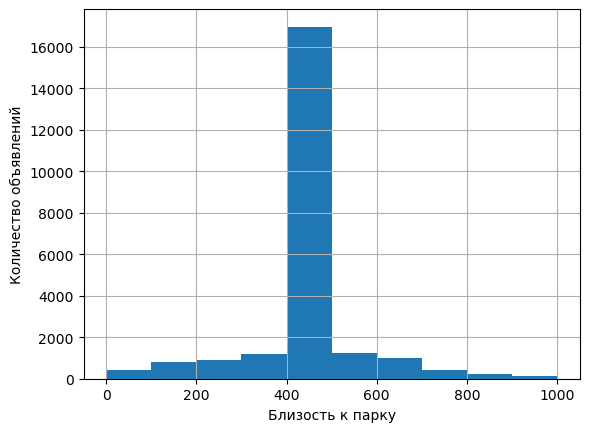

In [66]:
gr =data['parks_nearest'].plot(kind='hist', legend=False, 
    grid=True, range=(0,1000));
gr.set(xlabel='Близость к парку', ylabel='Количество объявлений')
gr;

Прекрасные условия для будущих покупателей квартир: расстояние у 16 тыс. продаваемых квартир до ближайшего парка 500 метров.

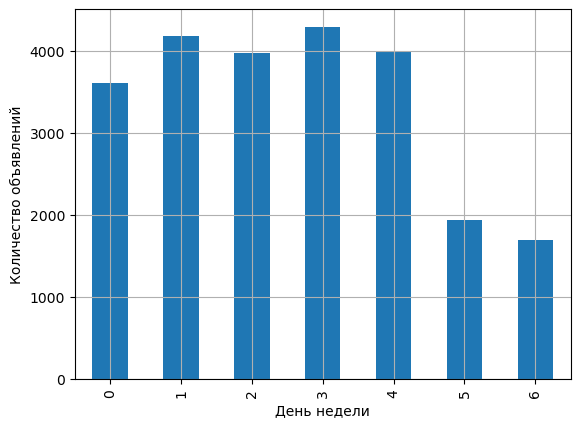

In [67]:
gr =data['weekday_exposition'].value_counts().sort_index(ascending=True).plot.bar(legend=False, 
    grid=True,);
gr.set(xlabel='День недели', ylabel='Количество объявлений')
gr;

Объявления чаще публикуются в будние дни.


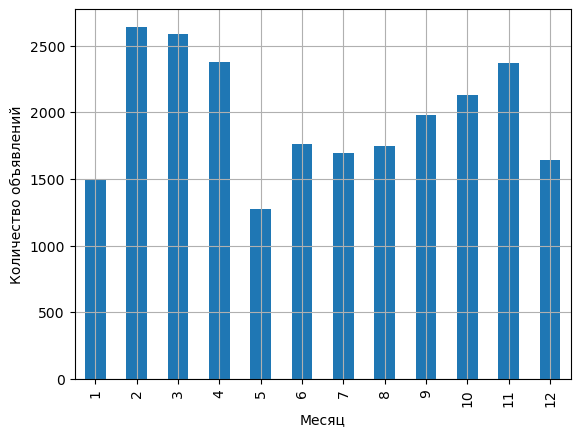

In [68]:
gr =data['month_exposition'].value_counts().sort_index(ascending=True).plot.bar(legend=False, 
    grid=True,);
gr.set(xlabel='Месяц', ylabel='Количество объявлений')
gr;

На графике видна активность в феврале и марте с последующим снижением к самому низкому значению в мае, а после подъем количества выставляемых объявлений до ноября. Низкая активность в декабке и январе в связи с новогодними праздниками.


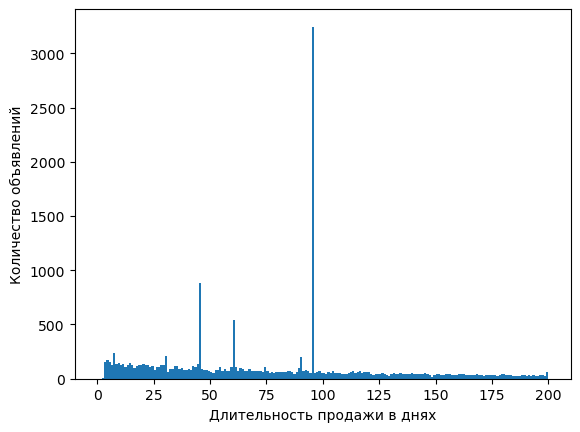

In [69]:
gr =data['days_exposition'].plot(kind='hist', bins = 200,  range=(0,200));
gr.set(xlabel='Длительность продажи в днях', ylabel='Количество объявлений')
gr;

График продажи квартир по дням говорит о наличии пика около 90 и 40 дней. Можно сказать об активных продажах в первые 30 дней нахождения объявления на рынке, далее снижаются продажа квартир, выставленных на рынке более значительное время.

In [70]:
round(data['days_exposition'].mean())

169

In [71]:
round(data['days_exposition'].median())

95

Среднее значение 169 сдвинуто из - за пиков, а медианное значение в 95 видно на графике. Продажи длиннее среднего значения можно считать долгими, а продажи до 30 дней - быстрыми.


Какие факторы больше всего влияют на общую (полную) стоимость объекта. Построим графики, которые покажут корреляцию цены от параметров: общая площадь, жилая площадь, площадь кухни, количество комнат, типа этажа, даты размещения (день недели, месяц, год).

In [72]:
list = ['total_area',
        'living_area',
        'kitchen_area',
        'rooms',
       ]

for row in list:
    correlation = data['last_price'].corr(data[row])
    print(f'Корреляция между last_price и {row} составляет: {correlation:0.2%}')

Корреляция между last_price и total_area составляет: 65.37%
Корреляция между last_price и living_area составляет: 54.07%
Корреляция между last_price и kitchen_area составляет: 44.03%
Корреляция между last_price и rooms составляет: 36.33%


Расчет корелляции показывает самую высокую прямую зависимость между жилой площадью и ценой квартиры. Далее из параметров влияющих на цену можно указать площадь кухни к количество комнат, общую площадь, но влияние слабее. Цена не зависит от даты размещения.


Коэффициент корреляции:  0.65


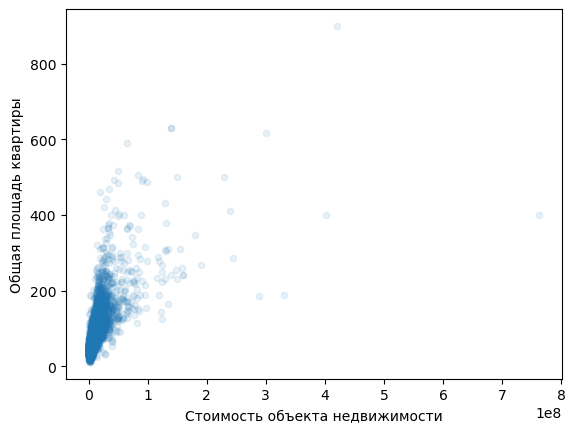

In [73]:
print("Коэффициент корреляции: ", round ( data['last_price'].corr(data['total_area']), 2))
      
      
gr = data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1);
gr.set(xlabel='Стоимость объекта недвижимости', ylabel='Общая площадь квартиры')
gr;

На диаграмме рассеяния видно что сильной корреляции нет, но зависимость прослеживается.

Коэффициент корреляции:  0.54


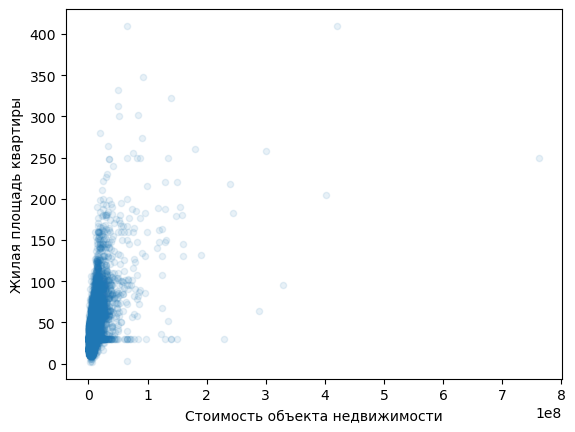

In [74]:
print("Коэффициент корреляции: ", round (data['last_price'].corr(data['living_area']), 2))
gr =data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.1)
gr.set(xlabel='Стоимость объекта недвижимости', ylabel='Жилая площадь квартиры')
gr;

Небольшая зависимость между жилой площадью и стоимостью квартиры прослеживается.


Коэффициент корреляции:  0.44


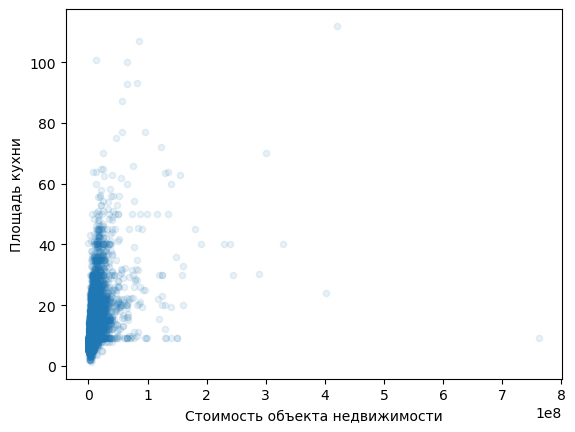

In [75]:
print("Коэффициент корреляции: ", round (data['last_price'].corr(data['kitchen_area']), 2))
gr =data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.1)
gr.set(xlabel='Стоимость объекта недвижимости', ylabel='Площадь кухни')
gr;

Небольшая зависимость между площадью кухни и стоимостью квартиры прослеживается.

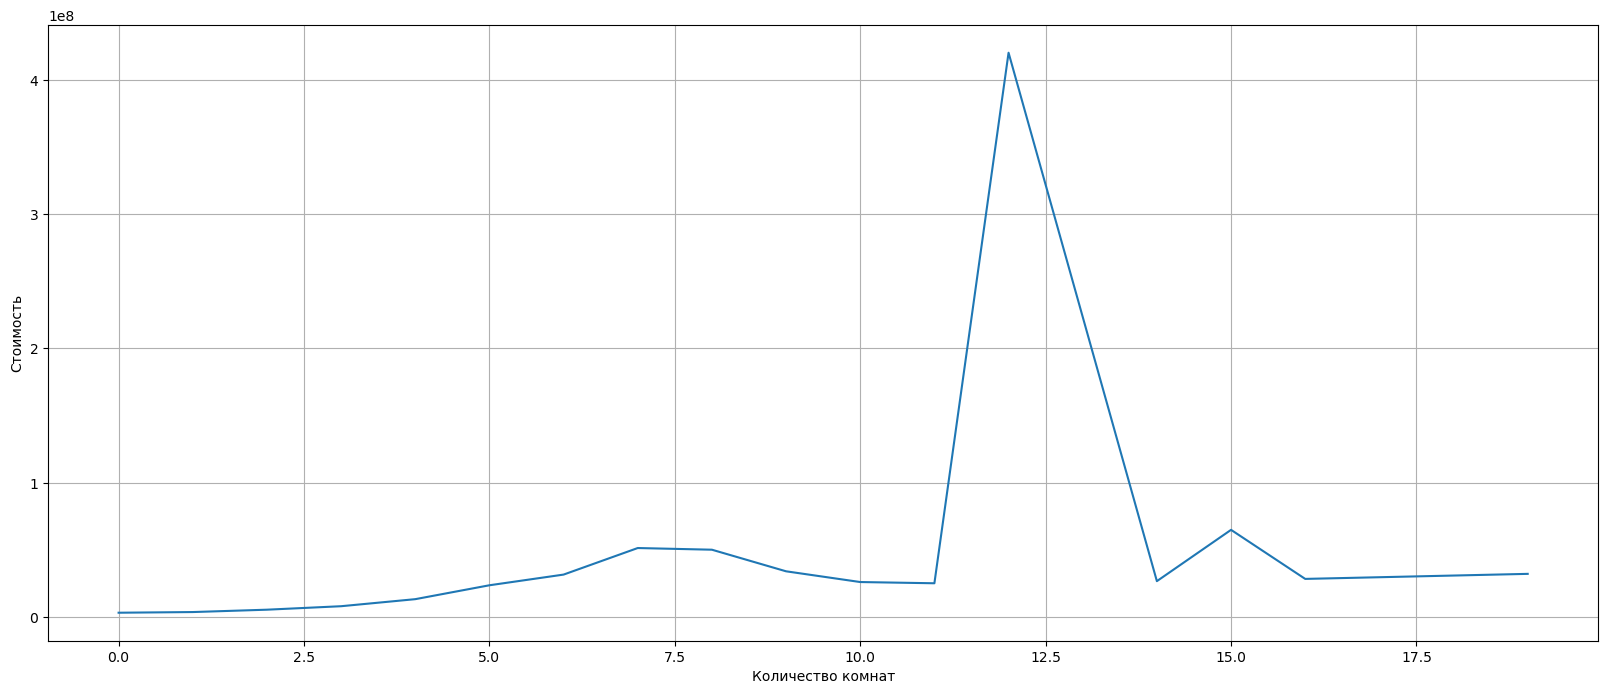

In [76]:
gr =data.groupby('rooms')['last_price'].mean().plot(figsize = (20, 8), grid=True);
gr.set(xlabel='Количество комнат', ylabel='Стоимость')
gr;

На графике виден пик в 420 млн.за квартиру в 12 комнат.

In [77]:
stat_floor_type=data.pivot_table(index='floor_type',values='last_price', aggfunc='median')
stat_floor_type

,last_price
floor_type,
Другой,4850000
Первый,3900000
Последний,4300000


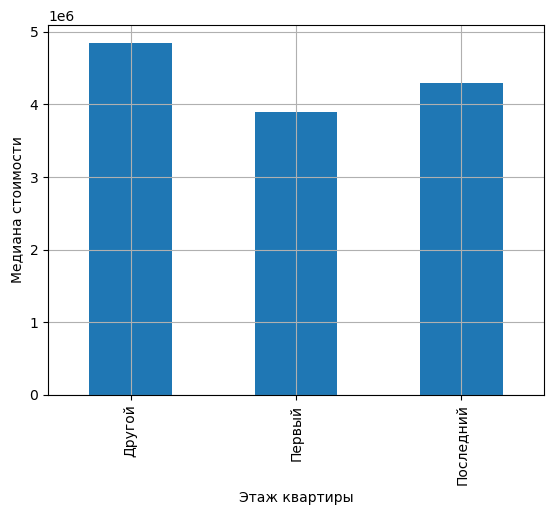

In [78]:
stat_floor_type.plot(
    y='last_price', 
    xlabel='Этаж квартиры', 
    ylabel='Медиана стоимости', 
    legend=False, 
    grid=True, 
    kind='bar'
);

Как видно на графике, первый этаж влияет на стоимость, она становится ниже.


In [79]:
stat_weekday_exposition=data.pivot_table(index='weekday_exposition',values='last_price', aggfunc='median')
stat_weekday_exposition

,last_price
weekday_exposition,
0,4650000
1,4730000
2,4700000
3,4650000
4,4585000
5,4555000
6,4550000


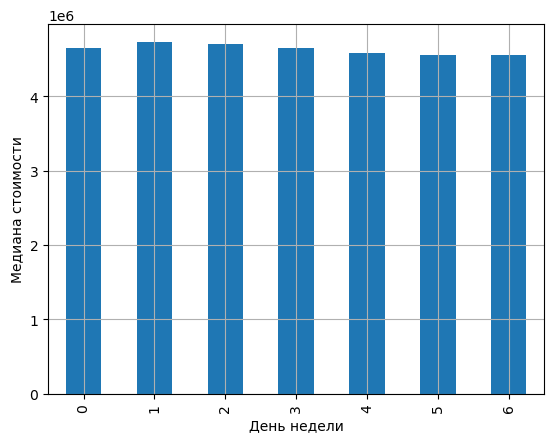

In [80]:
stat_weekday_exposition.plot(
    y='last_price', 
    xlabel='День недели', 
    ylabel='Медиана стоимости', 
    legend=False, 
    grid=True, 
    kind='bar'
);

В целом день недели в который размещено объявление не влияет на стоимость квартиры, но во вторник и в среду значение немного больше.

In [81]:
month_exposition=data.pivot_table(index='month_exposition',values='last_price', aggfunc='median')
month_exposition

,last_price
month_exposition,
1,4600000
2,4650000
3,4650000
4,4800000
5,4515000
6,4400000
7,4650000
8,4570000
9,4700000


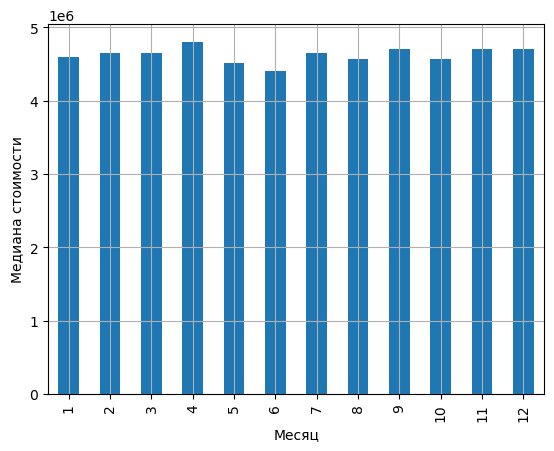

In [82]:
month_exposition.plot(
    y='last_price', 
    xlabel='Месяц', 
    ylabel='Медиана стоимости', 
    legend=False, 
    grid=True, 
    kind='bar'
);

На графике видно небольшое снижение цены в мае и июне, в апреле выставляют самые дорогие квартиры.

In [83]:
year_exposition=data.pivot_table(index='year_exposition',values='last_price', aggfunc='median')
year_exposition

,last_price
year_exposition,
2014,7700000
2015,5350000
2016,4550000
2017,4500000
2018,4550000
2019,5050000


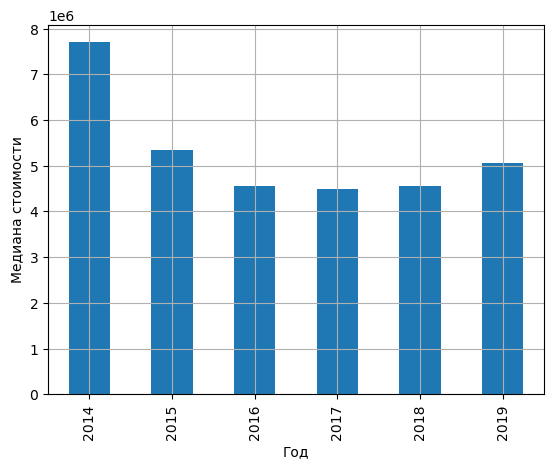

In [84]:
year_exposition.plot(
    y='last_price', 
    xlabel='Год', 
    ylabel='Медиана стоимости', 
    legend=False, 
    grid=True, 
    kind='bar'
);

Медианное значение стоимости по годам в 2014 году выше.

Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.


In [85]:
price_local = pd.pivot_table(data, index='locality_name', values='one_metr_price', aggfunc={'mean', 'count'})
price_local = price_local.sort_values(by='count', ascending=False)
price_local.head(10)

,count,mean
locality_name,,
санкт-петербург,15721,114849.008794
мурино,590,86087.512050
кудрово,472,95324.930544
шушары,440,78677.364217
всеволожск,398,68654.473986
пушкин,369,103125.819291
колпино,338,75424.579098
парголово,327,90175.913458
гатчина,307,68746.146763


В районы с самой высокой стоимостью кв.метра попал Санкт -Петербург со значительным отрывом. Далее идут Мурино, Кудрово, Шушары, стоимость далее снижается.

In [86]:
price_local_max = price_local.sort_values(by='mean', ascending=False)
price_local_max.head(1)

,count,mean
locality_name,,
зеленогорск,24,115122.799198


Самый дорогой объект недвижимости в Репино.

In [87]:
price_local_min = price_local.sort_values(by='mean', ascending=True)
price_local_min.head(1)

,count,mean
locality_name,,
старополье,3,11206.221198


Самый дешевый объект недвижимости в Старополье.


In [88]:
spb_center = data.loc[data['locality_name']=='санкт-петербург'].pivot_table(index='center_distance_km', values='last_price', aggfunc={'mean'})
spb_center['mean'] = spb_center['mean']/1000000
spb_center

,mean
center_distance_km,
0.0,31.449116
1.0,21.206721
2.0,17.788320
3.0,11.126581
4.0,13.304280
5.0,14.499121
6.0,15.338418
7.0,14.775153
8.0,9.957717


В таблице видно как меняется стоимость в зависимости от возрастания расстояния от центра в километрах. Расстояние от центра в 11 км. снижает стоимость объекта недвижимости в три раза.

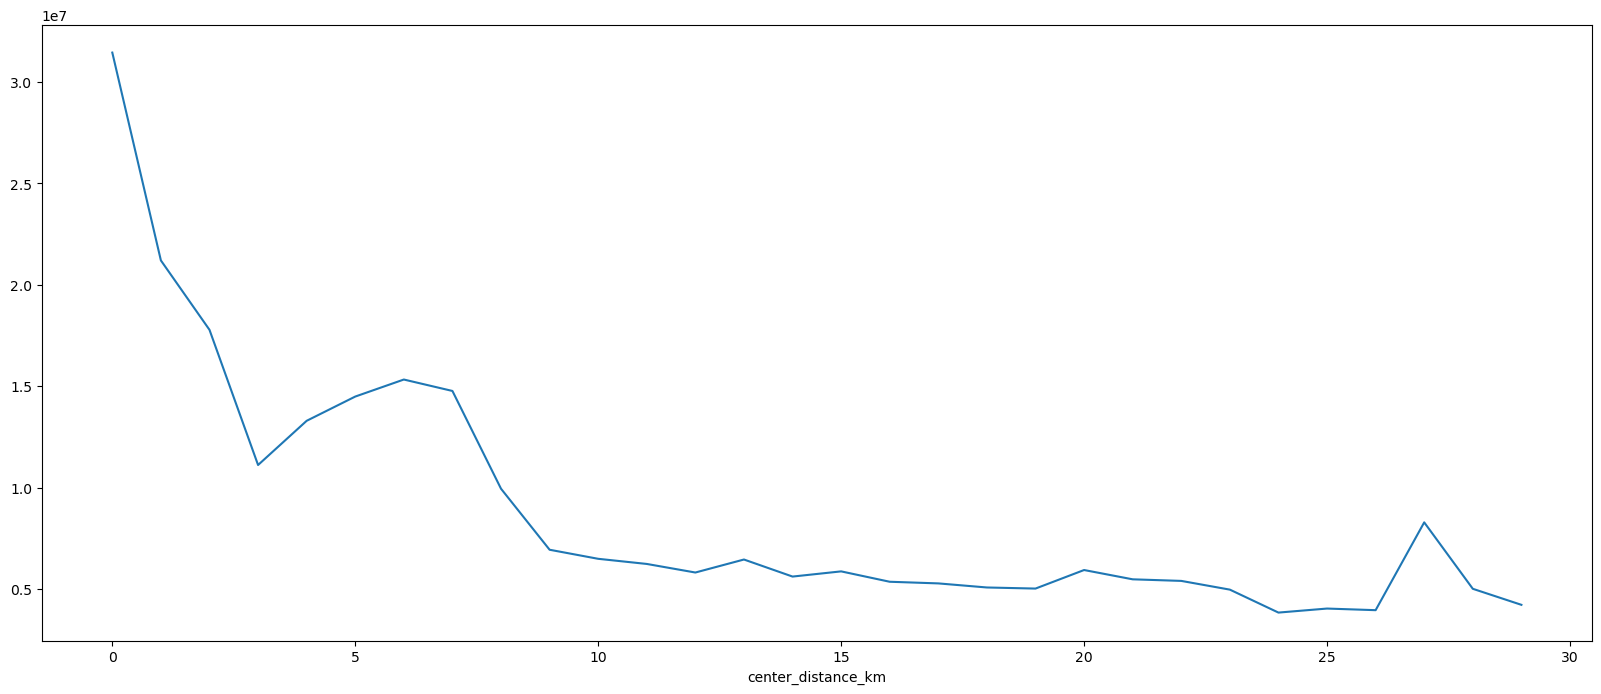

In [89]:
data[
        data['locality_name'] == 'санкт-петербург'
    ].groupby('center_distance_km')['last_price'].mean(
    ).plot(figsize = (20, 8));

График зависимости стоимости квадратного метра недвижимости от отдаления от центра города очень наглядно показывает снижение стоимости.

### Общий вывод

Предоставленные данные обработаны, проанализированы. Рассмотрены зависимости ключевых значений. Анализ данных позволяет  сделать следующие выводы: 

1. На стоимость квартир прямо пропорционально влияет общая и жилая площадь объекта недвижимости. Чем выше площадь, тем выше стоимость. Зависимость существует, но уровень коэффициента корреляции Пирсона не слишком высокий.( Коэффициент корреляции между стоимостью и жилой площадью = 57.08 (мах значение 1, чем выше, тем сильнее зависимость) Значения коэффициента корреляции Пирсона по общей площади, площади кухни и количеству комнат еще ниже) Соответственно, зависимость есть, но она не слишком высокая. 
 
2. На стоимость квартиры также влияют другие характеристики объектов недвижимости, такие как этаж на котором расположена сама квартира и этажность здания, в котором находится квартира. Квартира на первом этаже имеет стоимость ниже, чем остальные этажи.

3. Объявления о продаже квартир публикуются в будние дни чаще, чем в выходные, объясняется, скорее всего рабочими днями сотрудников агентств недвижимости. 

4. По количеству опубликованных объявлений лидирует февраль и март, данее активность идет на спад, к осени вновь набирая обороты. Самые не активные месяцы  - декабрь и январь - период новогодних праздников и каникул. Выявлена зависимость спада стоимости квартир в мае и июне. Возможно это связано с сезонным летним затишьем на рынке недвижимости.

5. Интересный момент про площадь кухни: в маленьких по площади квартирах этот показатель играет более важную роль, чем в больших по площади квартирах. 

6. Важная роль в ценообразовании объекта недвижимости занимает характеристики  "Близость от центра города", зависимость цены от этой характеристики обратно-пропорциональная: чем больше расстояние до центра города, тем меньше стоимость квартиры.


В ходе выполнения задания мне стало интересно описать наиболее частые средние характеристики вымышленной квартиры, успешно проданной, за наиболее характерное время продажи. По моему мнению средней квартирой является 1 или 2 -х комнатная квартира общей площадью примерно 40 кв.м., с жилой площадью около 30 кв.м., с площадью кухни 9 кв.м., стоимостью 4-5 млн., квартира расположена не на первом и не на последнем этаже пятиэтажного жилого дома, расстояние до ближайшего парка будет 500 м, до аэропорта 25 км. Скорее всего квартира будет удалена от центра города на расстояние 12.5 км. Но для лучшей продажи напишем, что наша вымышленная квартира находится в центре города. Также для лучшей продажи мы опубликуем объявление в будний день, но не в понедельник (количество объявлений, публикуемых в понедельник меньше, чем в другие будние дни), также мы будем продавать свою квартиру не в мае и не в июне, и не в период новогодних праздников. При хорошем стечении обстоятельств и при хорошем состоянии квартиры наш вымышленный объект недвижимости в течение 30 дней будет продан.  

Выполнять задания мне было очень интересно, возникало много вопросов, которые я постаралась решить.